In [9]:
# developed By - rajyavardhan bithale
# github - https://github.com/rajyavardhanbithale
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow,keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from PIL import ImageFile
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
import os

In [10]:
# Ignore all warning messages
warnings.filterwarnings("ignore")

In [11]:
# {'downdog': 0, 'tree': 1, 'warrior1': 2}
basedir = "/kaggle/input/yoga-pose-classification/dataset"

# path1_train = '/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/'
# path1_test = '/kaggle/input/yoga-pose-classification/dataset/yoga_set1/test/'

# class1 = ['downdog','tree','warrior1']

path2_train = '/kaggle/input/yoga-pose-classification/dataset/yoga_set2/train/'
path2_test = '/kaggle/input/yoga-pose-classification/dataset/yoga_set2/test/'

class2 = ['goddess','mountain','warrior2']

In [12]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [17]:
import os
from PIL import Image

def is_image_truncated(image_path):
    try:
        # Attempt to open the image
        img = Image.open(image_path)
        img.verify()  # Verify that the image is not truncated
        return False  # Image is not truncated
    except (IOError, SyntaxError) as e:
        # Image is truncated or corrupted
        return True

def remove_truncated_images(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(root, filename)
#             print(filepath)
            if is_image_truncated(filepath):
                print(f"Removing truncated image: {filepath}")
                os.remove(filepath)

# Specify the dataset directory
pose = class2
train_dataset_directory = '/kaggle/input/yoga-pose-classification/dataset/yoga_set2/train/'
test_dataset_directory = '/kaggle/input/yoga-pose-classification/dataset/yoga_set2/test/'

for p in pose:
    print(train_dataset_directory+p)
    print(test_dataset_directory+p)
    
    remove_truncated_images(train_dataset_directory+p)
    remove_truncated_images(test_dataset_directory+p)

/kaggle/input/yoga-pose-classification/dataset/yoga_set2/train/goddess
/kaggle/input/yoga-pose-classification/dataset/yoga_set2/test/goddess
/kaggle/input/yoga-pose-classification/dataset/yoga_set2/train/mountain
/kaggle/input/yoga-pose-classification/dataset/yoga_set2/test/mountain
/kaggle/input/yoga-pose-classification/dataset/yoga_set2/train/warrior2
/kaggle/input/yoga-pose-classification/dataset/yoga_set2/test/warrior2


In [14]:
def removeCorruptedImages(path):
    for filename in os.listdir(path):
        try:
            img = Image.open(os.path.join(path,filename))
            img.verify() 
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename)
            os.remove(os.path.join(path,filename))
            

class_pose = class2
path_train = path2_train
path_test = path2_test
            
for class_image in class_pose:
    print(path_train+class_image)
    removeCorruptedImages(path_train+class_image)
    
for class_image in class_pose:
    removeCorruptedImages(path_test+class_image)

/kaggle/input/yoga-pose-classification/dataset/yoga_set2/train/goddess
/kaggle/input/yoga-pose-classification/dataset/yoga_set2/train/mountain
/kaggle/input/yoga-pose-classification/dataset/yoga_set2/train/warrior2


In [15]:
read_file = cv2.imread('/kaggle/input/yoga-pose-classification/dataset/yoga_set2/train/warrior2/101.jpg')

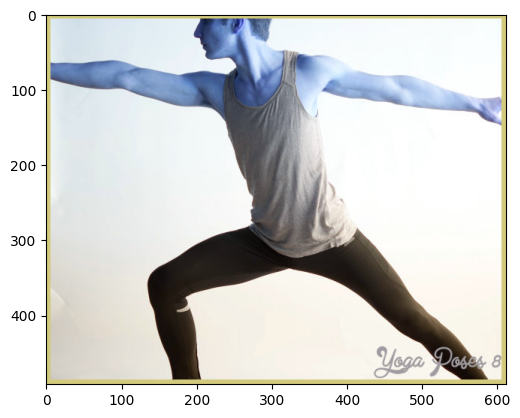

In [16]:
%matplotlib inline
plt.imshow(read_file)

In [18]:
train = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test = ImageDataGenerator(rescale=1./255)

In [19]:
iamge_size = 250

In [21]:

train_datagen = train.flow_from_directory(
                  directory = path_train,
                  target_size=(iamge_size,iamge_size),
                  batch_size=8,
                  shuffle=True,
                  color_mode="rgb",
                  class_mode='categorical'
)

test_datagen = test.flow_from_directory(
                  directory = path_test,
                  target_size=(iamge_size,iamge_size),
                  batch_size=8,
                  shuffle=True,
                  color_mode="rgb",
                  class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 219 images belonging to 3 classes.


In [22]:
train_datagen.image_shape

(250, 250, 3)

In [24]:
model = keras.Sequential([
    # CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(iamge_size,iamge_size,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(iamge_size,iamge_size,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=128,kernel_size=(3,3),input_shape=(iamge_size,iamge_size,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    
    # Dense
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(3,activation='softmax'),
    
])

optimizers = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
lo = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2, from_logits=True)

model.compile(
    optimizer=optimizers,
    loss=lo,
    metrics=['accuracy']
)


In [35]:
checkpoint_filepath = 'model_checkpoint_2.weights.h5'
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,
                                      save_weights_only=True,
                                      monitor='val_loss',
                                      mode='min',
                                      save_best_only=True)

if os.path.exists(checkpoint_filepath):
    model.load_weights(checkpoint_filepath)
    print("Checkpoint loaded successfully!")
    
model.fit(train_datagen,epochs=5,validation_data=test_datagen,callbacks=[checkpoint_callback])

Checkpoint loaded successfully!
Epoch 1/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 39s 228ms/step - accuracy: 0.9839 - loss: 0.5323 - val_accuracy: 0.9041 - val_loss: 0.6498
Epoch 2/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 38s 219ms/step - accuracy: 0.9924 - loss: 0.5232 - val_accuracy: 0.8904 - val_loss: 0.6446
Epoch 3/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 38s 221ms/step - accuracy: 0.9849 - loss: 0.5267 - val_accuracy: 0.9041 - val_loss: 0.6249
Epoch 4/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 38s 222ms/step - accuracy: 0.9927 - loss: 0.5140 - val_accuracy: 0.9224 - val_loss: 0.6106
Epoch 5/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 38s 217ms/step - accuracy: 0.9874 - loss: 0.5221 - val_accuracy: 0.9178 - val_loss: 0.6253


In [36]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,765,512 (105.92 MB)

 Trainable params: 13,882,755 (52.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,882,757 (52.96 MB)

In [37]:
model.evaluate(test_datagen)

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9191 - loss: 0.6224


[0.6253378391265869, 0.9178082346916199]

In [38]:
model.predict(test_datagen)[:5]

 4/28 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step 

W0000 00:00:1715425170.400346     327 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step


array([[0.6168507 , 0.31826228, 0.06488705],
       [0.8765965 , 0.09271247, 0.03069101],
       [0.87294245, 0.07849607, 0.04856141],
       [0.89712405, 0.05314171, 0.04973429],
       [0.04513993, 0.07929915, 0.87556094]], dtype=float32)

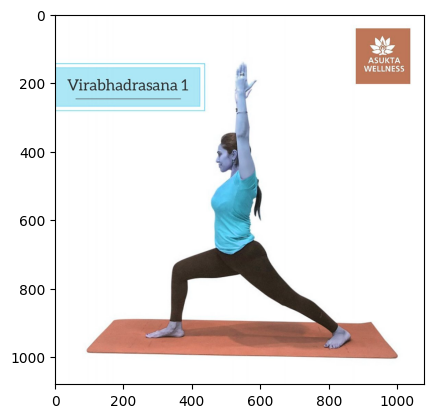

In [55]:
path = '/kaggle/input/yoga-pose-classification/dataset/yoga_set1/train/warrior1/127648413_3878095012215241_7078905487444642627_n.jpg'
img = cv2.imread(path)
plt.imshow(img)

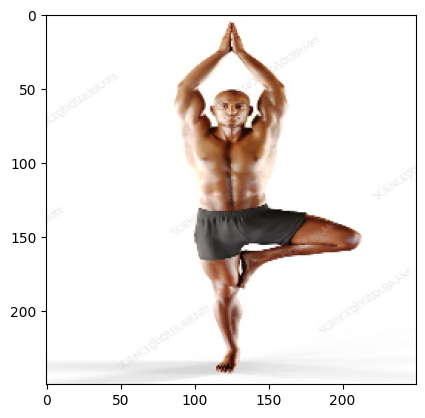

In [53]:
path = 'tree,jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_ref = cv2.resize(img,(250,250))

plt.imshow(img_ref)

In [46]:
img_ref.shape

(250, 250, 3)

In [43]:
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg

# predicting images
!wget https://cdn.yogajournal.com/wp-content/uploads/2021/12/Warrior-2-Pose_Andrew-Clark_2400x1350.jpeg -O tree.jpg
path = 'tree.jpg'

img = image.load_img(path, target_size=(250, 250))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
model.predict(x, batch_size=10)

--2024-05-11 11:02:16--  https://cdn.yogajournal.com/wp-content/uploads/2021/12/Warrior-2-Pose_Andrew-Clark_2400x1350.jpeg
Resolving cdn.yogajournal.com (cdn.yogajournal.com)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to cdn.yogajournal.com (cdn.yogajournal.com)|23.185.0.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125151 (122K) [image/jpeg]
Saving to: 'tree.jpg'

tree.jpg            100%[===================>] 122.22K  --.-KB/s    in 0.03s   

2024-05-11 11:02:16 (4.76 MB/s) - 'tree.jpg' saved [125151/125151]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0., 0., 1.]], dtype=float32)

In [48]:
model.save('ypset_2.h5')

In [52]:
# !pip install tensorflowjs
# !tensorflowjs_converter --input_format=tf_saved_model ypset2 tfypset2
!zip -r tfypset2.zip tfypset2 

  adding: tfypset2/ (stored 0%)
  adding: tfypset2/group1-shard2of14.bin (deflated 9%)
  adding: tfypset2/group1-shard7of14.bin (deflated 8%)
  adding: tfypset2/group1-shard14of14.bin (deflated 8%)
  adding: tfypset2/group1-shard8of14.bin (deflated 8%)
  adding: tfypset2/group1-shard3of14.bin (deflated 8%)
  adding: tfypset2/group1-shard4of14.bin (deflated 8%)
  adding: tfypset2/group1-shard11of14.bin (deflated 8%)
  adding: tfypset2/group1-shard12of14.bin (deflated 8%)
  adding: tfypset2/group1-shard6of14.bin (deflated 8%)
  adding: tfypset2/group1-shard1of14.bin (deflated 8%)
  adding: tfypset2/group1-shard10of14.bin (deflated 8%)
  adding: tfypset2/group1-shard5of14.bin (deflated 8%)
  adding: tfypset2/group1-shard13of14.bin (deflated 8%)
  adding: tfypset2/model.json (deflated 89%)
  adding: tfypset2/group1-shard9of14.bin (deflated 8%)
